<a href="https://colab.research.google.com/github/danon6868/BI-ml-course/blob/main/lecture_9_cnn_part1/homework/hw_cnn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$: 
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) 
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [ ]:
import torch
import numpy as np
import random

In [ ]:
RANDOM_SEED = 666
torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [ ]:
# Можете тренироваться на этом примере
a = np.arange(9).reshape((3, 3))
M = np.block([[a, a],[a, a]])
print(M)

[[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]]


In [ ]:
# how to apply kernel:
# https://numpy.org/doc/stable/reference/generated/numpy.multiply.html
np.sum(np.multiply(np.array([1,2,3,5]), np.array([1, -1, 0, 2])))

9

In [ ]:
# https://youtu.be/8EGjN8WzRSI?list=PLjKdf6AHvR-FlMDSANHZQVkrq2FKFFlhC&t=1290

def conv(x, kernel, stride, pad):
    # YOUR CODE IS HERE
    W, H, K = x.shape[0], x.shape[1], kernel.shape[0]
    w = 1 + (W + 2*pad - K) // stride
    h = 1 + (H + 2*pad - K) // stride

    x_padded = np.zeros((W + pad*2, H + pad*2))
    x_padded[pad:-pad, pad:-pad] = x

    res = np.zeros((w, h))
    for i in range(0, W - K + 2*pad + 1, stride):
      for j in range(0, H - K + 2*pad +1, stride):
        res[i//stride, j//stride] = np.sum(np.multiply(x_padded[i:i+K, j:j+K], kernel))
    
    return res

In [ ]:
conv(np.array([[1,]]), np.ones((2,2)), stride=1, pad=1)

array([[1., 1.],
       [1., 1.]])

In [ ]:
conv(np.array([[1,1,], [1,1,]]), np.ones((2,2)), stride=1, pad=1)

array([[1., 2., 1.],
       [2., 4., 2.],
       [1., 2., 1.]])

In [ ]:
conv(np.array([[1,2,3], [4,5,6], [7,8,9]]), np.ones((2,2)), stride=1, pad=1)

array([[ 1.,  3.,  5.,  3.],
       [ 5., 12., 16.,  9.],
       [11., 24., 28., 15.],
       [ 7., 15., 17.,  9.]])

In [ ]:
sobel_kernel_vert = torch.Tensor([
                                  [-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]
])


sobel_kernel_hor = torch.Tensor([
                                 [-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]
])

Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

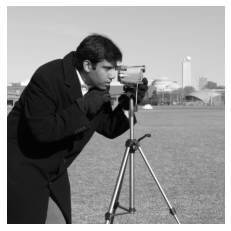

In [ ]:
from skimage import data
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 4, 4

camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

<font size=3 color='royalblue'><b>Let's apply these two kernels to the picture with different `stride` and `pad` values:</b></font>

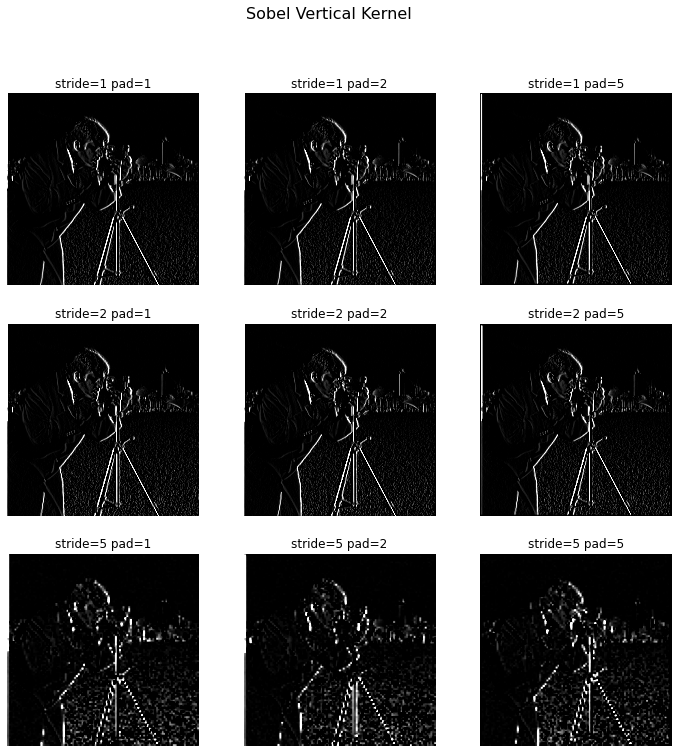

In [ ]:
plt.rcParams["figure.figsize"] = 12, 12

fig, axs = plt.subplots(3, 3)
for row, stride in enumerate([1, 2, 5]):
  for col, pad in enumerate([1, 2, 5]):
    img_filtered = conv(camera.astype('int'), sobel_kernel_vert.numpy(), stride=stride, pad=pad)
    axs[row, col].imshow(img_filtered, cmap="gray", vmin=0, vmax=255)
    axs[row, col].set_title(f"stride={stride} pad={pad}")
    axs[row, col].axis('off')

# plt.tight_layout()
fig.suptitle("Sobel Vertical Kernel", fontsize=16);

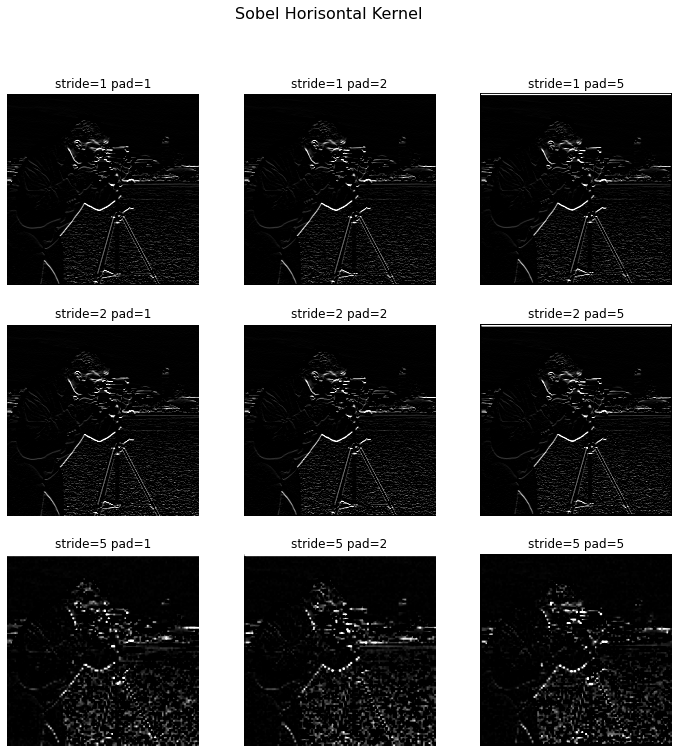

In [ ]:
plt.rcParams["figure.figsize"] = 12, 12

fig, axs = plt.subplots(3, 3)
for row, stride in enumerate([1, 2, 5]):
  for col, pad in enumerate([1, 2, 5]):
    img_filtered = conv(camera.astype('int'), sobel_kernel_hor.numpy(), stride=stride, pad=pad)
    axs[row, col].imshow(img_filtered, cmap="gray", vmin=0, vmax=255)
    axs[row, col].set_title(f"stride={stride} pad={pad}")
    axs[row, col].axis('off')

fig.suptitle("Sobel Horisontal Kernel", fontsize=16);

Допишите код ниже и проинтерпретируйте полученный результат:

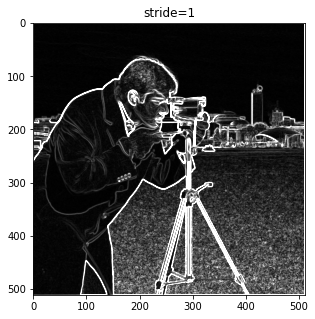

In [ ]:
plt.rcParams["figure.figsize"] = 5, 5
camera_s_hor_filter = conv(camera.astype('int'), sobel_kernel_hor.numpy(), stride=1, pad=1) # результат применения sobel_kernel_hor
camera_s_vert_filter = conv(camera.astype('int'), sobel_kernel_vert.numpy(), stride=1, pad=1) # результат применения sobel_kernel_vert
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255)
plt.title("stride=1");

<font size=3 color='royalblue'><b>Edge detection algorithm!! 🔲 🔳 </b></font>

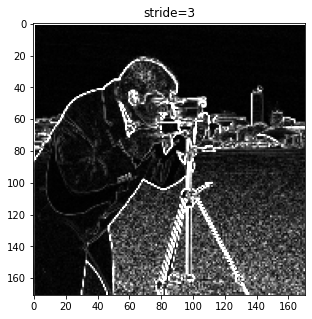

In [ ]:
# stride=3
camera_s_hor_filter = conv(camera.astype('int'), sobel_kernel_hor.numpy(), stride=3, pad=1) # результат применения sobel_kernel_hor
camera_s_vert_filter = conv(camera.astype('int'), sobel_kernel_vert.numpy(), stride=3, pad=1) # результат применения sobel_kernel_vert
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255)
plt.title("stride=3");

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [ ]:
import torch

INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 10 # можно будет при желании увеличить
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os
 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

clear_output()

In [ ]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

clear_output()

In [ ]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)
        # there was an error here ;) I fixed it :)
        else:
            transformed_img = self._transforms_for_plot(image)
        
        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]
        
        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [ ]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
print("our classes:", train_dataset.class_dir)

from collections import defaultdict

class_samples_counts = defaultdict(int)
for image, label in train_dataset:
  class_samples_counts[label] += 1
print("class samples:", class_samples_counts)

our classes: {'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}
class samples: defaultdict(<class 'int'>, {0: 345, 1: 348, 2: 341})


Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

In [ ]:
valid_dataset[10][0].shape, valid_dataset[10][1]

(torch.Size([3, 227, 227]), 0)

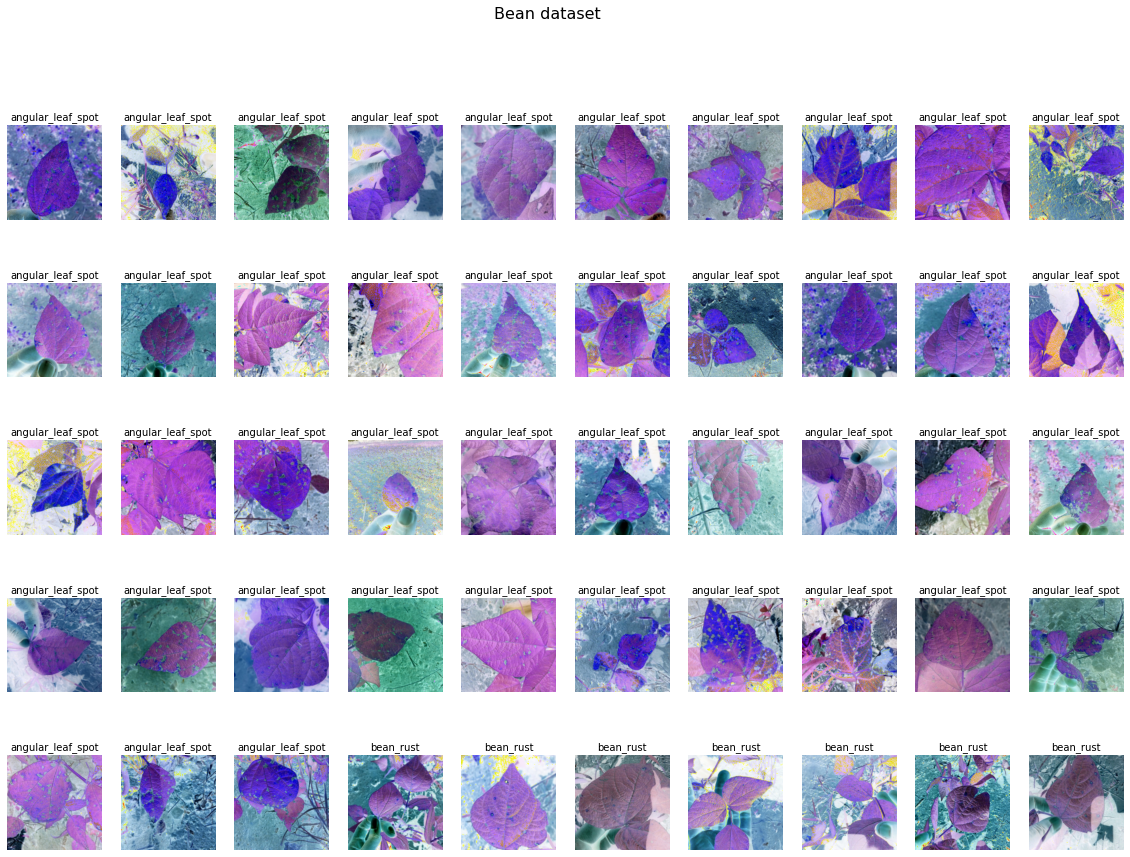

In [ ]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)
    
fig.suptitle("Bean dataset", fontsize=16);

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

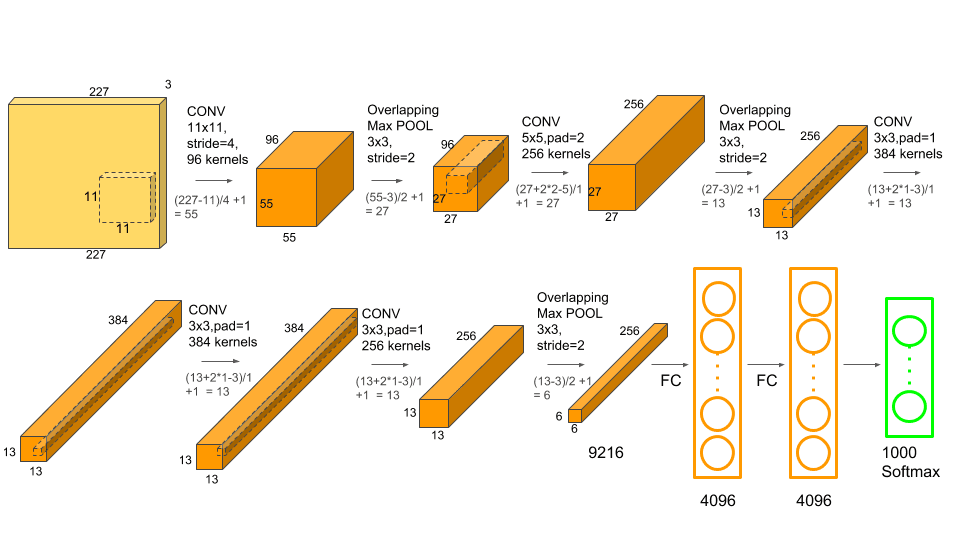

In [ ]:
N_CLASSES = 3 # определите число классов в данных
LEARNING_RATE = 3e-4 # можно подобрать как-то другой)

[Nueral Network Zoo](https://www.asimovinstitute.org/neural-network-zoo/)   👾 🟡 🟢 🔵 🔴




In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE IS HERE

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=256*6*6, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=3),
        )

    def forward(self,x):
        # YOUR CODE IS HERE
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [ ]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model - 
    dataloader - 
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            # should we use proba here instead of outputs? no need in fact:
            # `outputs` and `outputs.data - are both logits (about `data` attribute https://stackoverflow.com/a/51744091)
            # so we have 3 logits per image.
            # torch.max(t, 1) returns two objects:
            #    max values along dimension 1
            #    indices of those max values, which are our labels
            # so we can compare them with `labels`
            _, predicted = torch.max(outputs.data, 1)
            # https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#test-the-network-on-the-test-data

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    
    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

22:26:56 --- Epoch: 0	Train loss: 118.7448	Valid loss: 1.0994	Train accuracy: 33.37	Valid accuracy: 33.08
22:27:21 --- Epoch: 1	Train loss: 1.1054	Valid loss: 1.1000	Train accuracy: 32.98	Valid accuracy: 33.08
22:27:43 --- Epoch: 2	Train loss: 1.1001	Valid loss: 1.0990	Train accuracy: 33.37	Valid accuracy: 33.08
22:28:06 --- Epoch: 3	Train loss: 1.0995	Valid loss: 1.0988	Train accuracy: 32.98	Valid accuracy: 33.08
22:28:28 --- Epoch: 4	Train loss: 1.0995	Valid loss: 1.0986	Train accuracy: 33.66	Valid accuracy: 33.83
22:28:50 --- Epoch: 5	Train loss: 1.0988	Valid loss: 1.0992	Train accuracy: 33.66	Valid accuracy: 33.83
22:29:12 --- Epoch: 6	Train loss: 1.1000	Valid loss: 1.0989	Train accuracy: 33.66	Valid accuracy: 33.83
22:29:34 --- Epoch: 7	Train loss: 1.0994	Valid loss: 1.0988	Train accuracy: 33.66	Valid accuracy: 33.83
22:29:55 --- Epoch: 8	Train loss: 1.0992	Valid loss: 1.0986	Train accuracy: 33.66	Valid accuracy: 33.83
22:30:17 --- Epoch: 9	Train loss: 1.0987	Valid loss: 1.0986	Tr

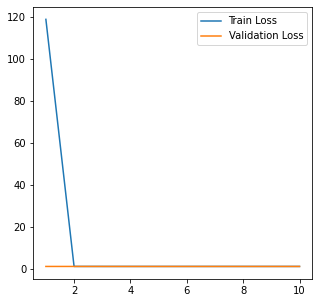

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

<font size=3 color='royalblue'><b>Ha-ha! neither loss nor accuracy goes down. Let's try to decrease learning rate.</b></font>


<font size=3 color='royalblue'><b>Btw, I think a good explanation is here: <https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf>, first few slides.</b></font>


<font size=3 color='royalblue'><b>So below are some experiments with decreased learning rate</b></font>

22:30:39 --- Epoch: 0	Train loss: 1.9224	Valid loss: 1.2205	Train accuracy: 32.79	Valid accuracy: 33.83
22:31:00 --- Epoch: 1	Train loss: 1.0999	Valid loss: 1.2253	Train accuracy: 44.00	Valid accuracy: 41.35
22:31:21 --- Epoch: 2	Train loss: 1.1069	Valid loss: 1.0819	Train accuracy: 34.62	Valid accuracy: 34.59
22:31:42 --- Epoch: 3	Train loss: 1.0007	Valid loss: 1.0035	Train accuracy: 55.71	Valid accuracy: 55.64
22:32:03 --- Epoch: 4	Train loss: 0.9598	Valid loss: 0.8705	Train accuracy: 54.64	Valid accuracy: 53.38
22:32:24 --- Epoch: 5	Train loss: 0.8547	Valid loss: 0.8181	Train accuracy: 63.44	Valid accuracy: 60.15
22:32:45 --- Epoch: 6	Train loss: 0.8143	Valid loss: 0.7825	Train accuracy: 65.38	Valid accuracy: 65.41
22:33:06 --- Epoch: 7	Train loss: 0.7337	Valid loss: 0.8775	Train accuracy: 57.35	Valid accuracy: 59.40
22:33:27 --- Epoch: 8	Train loss: 0.7348	Valid loss: 0.6845	Train accuracy: 72.82	Valid accuracy: 70.68
22:33:48 --- Epoch: 9	Train loss: 0.5984	Valid loss: 0.7056	Trai

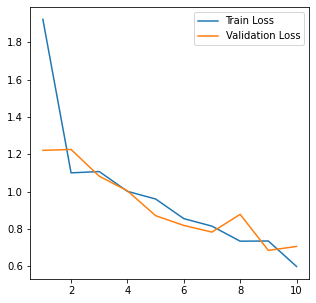

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

22:34:09 --- Epoch: 0	Train loss: 1.0689	Valid loss: 0.9928	Train accuracy: 48.84	Valid accuracy: 48.12
22:34:30 --- Epoch: 1	Train loss: 0.9085	Valid loss: 0.8909	Train accuracy: 52.42	Valid accuracy: 54.14
22:34:51 --- Epoch: 2	Train loss: 0.8641	Valid loss: 0.8460	Train accuracy: 62.38	Valid accuracy: 63.16
22:35:12 --- Epoch: 3	Train loss: 0.7988	Valid loss: 0.7651	Train accuracy: 71.37	Valid accuracy: 68.42
22:35:33 --- Epoch: 4	Train loss: 0.6923	Valid loss: 0.6695	Train accuracy: 71.86	Valid accuracy: 72.93
22:35:54 --- Epoch: 5	Train loss: 0.6274	Valid loss: 0.7770	Train accuracy: 70.12	Valid accuracy: 73.68
22:36:15 --- Epoch: 6	Train loss: 0.5870	Valid loss: 0.5961	Train accuracy: 76.69	Valid accuracy: 75.19
22:36:36 --- Epoch: 7	Train loss: 0.5697	Valid loss: 0.6833	Train accuracy: 71.86	Valid accuracy: 73.68
22:36:57 --- Epoch: 8	Train loss: 0.7297	Valid loss: 0.5674	Train accuracy: 76.98	Valid accuracy: 78.95
22:37:18 --- Epoch: 9	Train loss: 0.5361	Valid loss: 0.5219	Trai

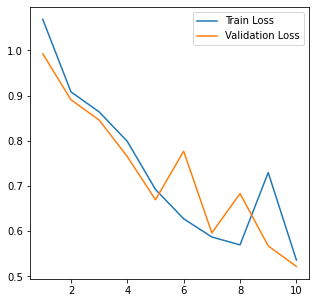

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

22:37:40 --- Epoch: 0	Train loss: 1.0130	Valid loss: 0.7926	Train accuracy: 67.79	Valid accuracy: 69.92
22:38:00 --- Epoch: 1	Train loss: 0.7970	Valid loss: 0.7231	Train accuracy: 68.28	Valid accuracy: 63.91
22:38:21 --- Epoch: 2	Train loss: 0.7407	Valid loss: 0.6835	Train accuracy: 71.37	Valid accuracy: 70.68
22:38:43 --- Epoch: 3	Train loss: 0.6992	Valid loss: 0.6517	Train accuracy: 73.60	Valid accuracy: 72.93
22:39:04 --- Epoch: 4	Train loss: 0.6292	Valid loss: 0.6227	Train accuracy: 74.27	Valid accuracy: 74.44
22:39:24 --- Epoch: 5	Train loss: 0.5983	Valid loss: 0.5943	Train accuracy: 77.76	Valid accuracy: 79.70
22:39:45 --- Epoch: 6	Train loss: 0.5757	Valid loss: 0.6221	Train accuracy: 77.18	Valid accuracy: 72.93
22:40:06 --- Epoch: 7	Train loss: 0.5415	Valid loss: 0.7325	Train accuracy: 74.18	Valid accuracy: 73.68
22:40:27 --- Epoch: 8	Train loss: 0.5489	Valid loss: 0.5324	Train accuracy: 82.69	Valid accuracy: 75.94
22:40:48 --- Epoch: 9	Train loss: 0.4379	Valid loss: 0.4966	Trai

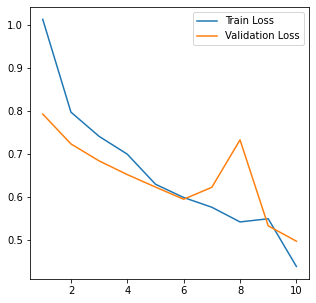

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

22:41:10 --- Epoch: 0	Train loss: 1.0380	Valid loss: 0.9534	Train accuracy: 50.00	Valid accuracy: 51.13
22:41:31 --- Epoch: 1	Train loss: 0.8456	Valid loss: 0.7620	Train accuracy: 64.02	Valid accuracy: 65.41
22:41:52 --- Epoch: 2	Train loss: 0.7656	Valid loss: 0.7370	Train accuracy: 68.47	Valid accuracy: 69.92
22:42:13 --- Epoch: 3	Train loss: 0.7254	Valid loss: 0.6757	Train accuracy: 70.99	Valid accuracy: 72.18
22:42:34 --- Epoch: 4	Train loss: 0.6825	Valid loss: 0.6396	Train accuracy: 71.86	Valid accuracy: 74.44
22:42:55 --- Epoch: 5	Train loss: 0.6235	Valid loss: 0.6908	Train accuracy: 73.89	Valid accuracy: 72.93
22:43:16 --- Epoch: 6	Train loss: 0.5837	Valid loss: 0.6365	Train accuracy: 73.98	Valid accuracy: 74.44
22:43:37 --- Epoch: 7	Train loss: 0.5782	Valid loss: 0.6707	Train accuracy: 71.86	Valid accuracy: 69.92
22:43:58 --- Epoch: 8	Train loss: 0.5797	Valid loss: 0.6104	Train accuracy: 77.37	Valid accuracy: 74.44
22:44:19 --- Epoch: 9	Train loss: 0.5420	Valid loss: 0.6791	Trai

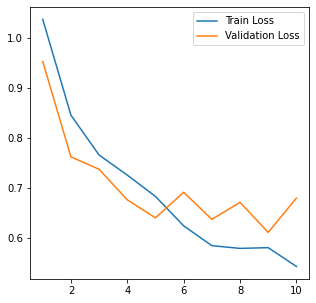

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

22:51:23 --- Epoch: 0	Train loss: 1.0955	Valid loss: 1.0887	Train accuracy: 52.13	Valid accuracy: 51.13
22:51:45 --- Epoch: 1	Train loss: 1.0687	Valid loss: 1.0362	Train accuracy: 61.51	Valid accuracy: 57.89
22:52:07 --- Epoch: 2	Train loss: 0.9604	Valid loss: 0.8621	Train accuracy: 61.99	Valid accuracy: 64.66
22:52:28 --- Epoch: 3	Train loss: 0.7981	Valid loss: 0.7737	Train accuracy: 65.57	Valid accuracy: 67.67
22:52:49 --- Epoch: 4	Train loss: 0.7307	Valid loss: 0.7192	Train accuracy: 70.21	Valid accuracy: 68.42
22:53:10 --- Epoch: 5	Train loss: 0.7159	Valid loss: 0.7147	Train accuracy: 71.28	Valid accuracy: 70.68
22:53:31 --- Epoch: 6	Train loss: 0.6946	Valid loss: 0.7161	Train accuracy: 68.76	Valid accuracy: 70.68
22:53:52 --- Epoch: 7	Train loss: 0.6840	Valid loss: 0.7156	Train accuracy: 68.86	Valid accuracy: 69.17
22:54:14 --- Epoch: 8	Train loss: 0.6731	Valid loss: 0.6685	Train accuracy: 73.02	Valid accuracy: 72.93
22:54:35 --- Epoch: 9	Train loss: 0.6430	Valid loss: 0.6574	Trai

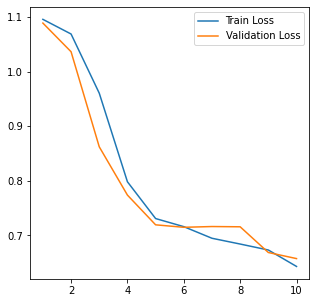

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, 10, DEVICE)
test_acc = get_accuracy(model, testloader, device=DEVICE)
print(f'Test accuracy: {100 * test_acc:.2f}')

22:54:57 --- Epoch: 0	Train loss: 1.0923	Valid loss: 1.0806	Train accuracy: 60.35	Valid accuracy: 59.40
22:55:18 --- Epoch: 1	Train loss: 1.0522	Valid loss: 1.0098	Train accuracy: 60.44	Valid accuracy: 60.15
22:55:39 --- Epoch: 2	Train loss: 0.9203	Valid loss: 0.8612	Train accuracy: 61.51	Valid accuracy: 66.17
22:56:00 --- Epoch: 3	Train loss: 0.7762	Valid loss: 0.7221	Train accuracy: 69.54	Valid accuracy: 70.68
22:56:21 --- Epoch: 4	Train loss: 0.7540	Valid loss: 0.7085	Train accuracy: 69.15	Valid accuracy: 72.93
22:56:42 --- Epoch: 5	Train loss: 0.7087	Valid loss: 0.6684	Train accuracy: 70.12	Valid accuracy: 72.18
22:57:03 --- Epoch: 6	Train loss: 0.6858	Valid loss: 0.6725	Train accuracy: 71.08	Valid accuracy: 71.43
22:57:24 --- Epoch: 7	Train loss: 0.6716	Valid loss: 0.6423	Train accuracy: 71.86	Valid accuracy: 76.69
22:57:45 --- Epoch: 8	Train loss: 0.6651	Valid loss: 0.6393	Train accuracy: 73.11	Valid accuracy: 73.68
22:58:06 --- Epoch: 9	Train loss: 0.6523	Valid loss: 0.6622	Trai

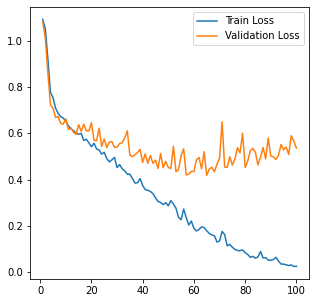

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, 100, DEVICE)
test_acc = get_accuracy(model, testloader, device=DEVICE)
print(f'Test accuracy: {100 * test_acc:.2f}')

<font size=3 color='royalblue'><b>This training we did by small steps but for longer time, so we have more information to analyze.
From *loss* plot we can see that the minimal loss is around 0.41, which we had around epoch 55-60. That moment is epoch 56,  *train accuracy=93* and *valid accuracy=87*, so 56th model is a bit overfitted. Then *validation loss* increases, we see *train accuracy* goes up to 99%, while *valid accuracy* goes slowly up to 89% maximum, so the model gets significantly overfitted. </b></font>

<font size=3 color='royalblue'><b>Checkpointing would help us to save and get 56th model, but not this time 😅 </b></font>

23:36:36 --- Epoch: 0	Train loss: 1.0472	Valid loss: 1.4023	Train accuracy: 36.17	Valid accuracy: 33.08
23:36:57 --- Epoch: 1	Train loss: 0.8696	Valid loss: 0.8865	Train accuracy: 62.48	Valid accuracy: 57.89
23:37:18 --- Epoch: 2	Train loss: 0.7677	Valid loss: 0.8381	Train accuracy: 65.38	Valid accuracy: 66.17
23:37:40 --- Epoch: 3	Train loss: 0.7376	Valid loss: 0.7555	Train accuracy: 67.79	Valid accuracy: 63.91
23:38:01 --- Epoch: 4	Train loss: 0.7004	Valid loss: 0.7673	Train accuracy: 66.83	Valid accuracy: 63.91
23:38:22 --- Epoch: 5	Train loss: 0.6991	Valid loss: 0.8998	Train accuracy: 64.80	Valid accuracy: 63.91
23:38:43 --- Epoch: 6	Train loss: 0.6789	Valid loss: 0.9253	Train accuracy: 58.90	Valid accuracy: 55.64
23:39:04 --- Epoch: 7	Train loss: 0.6810	Valid loss: 1.0466	Train accuracy: 55.61	Valid accuracy: 49.62
23:39:25 --- Epoch: 8	Train loss: 0.6777	Valid loss: 0.6938	Train accuracy: 71.28	Valid accuracy: 68.42
23:39:46 --- Epoch: 9	Train loss: 0.6396	Valid loss: 0.6967	Trai

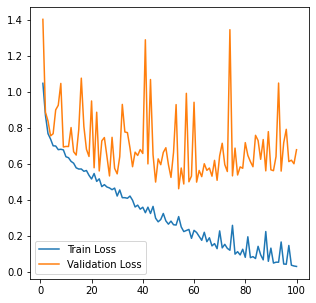

In [ ]:
%%time
model = AlexNet().to(DEVICE)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, 100, DEVICE)

<font size=3 color='royalblue'><b>I expected RMSprop to show better results since it has adaptive learning rate, however it also not that good.
Comparing it with 100 epochs of Adam optimizer, we can see that the	weights	jump to and from across the ravine, as the [lecture](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf) explains.

So RMSprop did not pay off today 🤷‍♀️ Adam did 😎</b></font>


Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

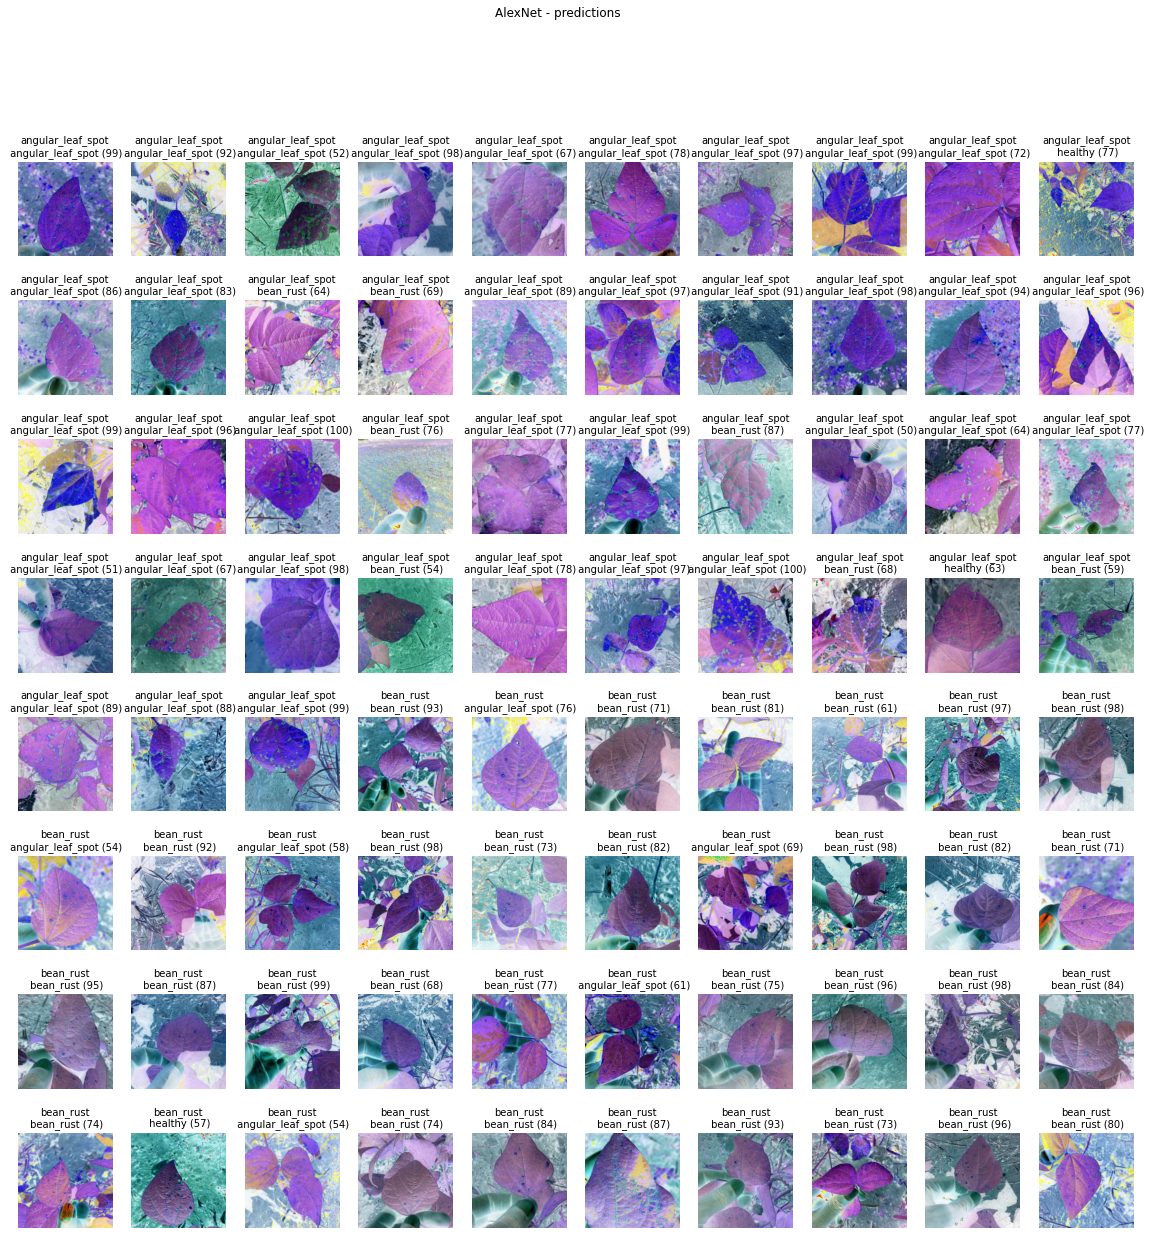

In [ ]:
ROW_IMG = 10
N_ROWS = 8

fig = plt.figure(figsize=(20, 20))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    
    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[valid_dataset[index][1]]}\n {valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"
    
    plt.title(title, fontsize=10)

fig.suptitle('AlexNet - predictions');

<font size=3 color='royalblue'><b>Even though I've managed to obtain 87% of valid accuracy, it's not as good as for MNIST classification with 98% accuracy.
</b></font>

<font size=3 color='royalblue'><b>From predictions above and partial visualised results:
👀 there is three *healthy* leaves with >57% probability, which are not healthy in fact❗ 
</b></font>


<font size=3 color='royalblue'><b>So model is not very accurate, but it's a way better than 3-side-coin flipping. (We have 1034 images in traindataset and three classes, roughly 33% samples for each class: 
{0: 345, 1: 348, 2: 341}).</b></font>


<font size=3 color='gren'><b>Summary: </b></font>
<font size=3 color='royalblue'><b>Here I used small learing rate, but increased the number of the epoch to reach the minimal loss.</b></font>

## Real Alex Net

Original AlexNet has dropout levels: <https://github.com/pytorch/vision/blob/main/torchvision/models/alexnet.py>.
Can we obtain higher accuracy and avoid overfitting with it?

In [ ]:
class AlexNetTorch(nn.Module):
    def __init__(self, num_classes: int = 3, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 3),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        probs = F.softmax(x, dim=1)
        return x, probs

In [ ]:
# bigger batches
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

21:21:16 --- Epoch: 0	Train loss: 1.0981	Valid loss: 1.0965	Train accuracy: 49.61	Valid accuracy: 48.87
21:21:41 --- Epoch: 1	Train loss: 1.0955	Valid loss: 1.0933	Train accuracy: 50.39	Valid accuracy: 48.87
21:22:08 --- Epoch: 2	Train loss: 1.0909	Valid loss: 1.0858	Train accuracy: 43.52	Valid accuracy: 45.11
21:22:33 --- Epoch: 3	Train loss: 1.0817	Valid loss: 1.0700	Train accuracy: 46.23	Valid accuracy: 45.86
21:22:59 --- Epoch: 4	Train loss: 1.0598	Valid loss: 1.0352	Train accuracy: 54.16	Valid accuracy: 54.14
21:23:24 --- Epoch: 5	Train loss: 1.0177	Valid loss: 0.9706	Train accuracy: 56.96	Valid accuracy: 57.89
21:23:50 --- Epoch: 6	Train loss: 0.9332	Valid loss: 0.8791	Train accuracy: 63.93	Valid accuracy: 60.90
21:24:15 --- Epoch: 7	Train loss: 0.8462	Valid loss: 0.8167	Train accuracy: 65.28	Valid accuracy: 63.91
21:24:40 --- Epoch: 8	Train loss: 0.8072	Valid loss: 0.7770	Train accuracy: 65.96	Valid accuracy: 64.66
21:25:05 --- Epoch: 9	Train loss: 0.7652	Valid loss: 0.7663	Trai

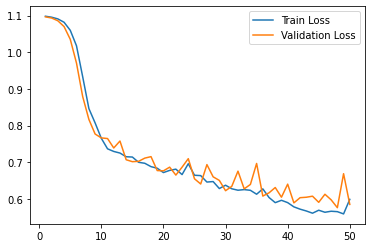

In [ ]:
%%time
model = AlexNetTorch().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss()
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, 50, DEVICE)
test_acc = get_accuracy(model, testloader, device=DEVICE)
print(f'Test accuracy: {100 * test_acc:.2f}')

21:50:06 --- Epoch: 0	Train loss: 0.5208	Valid loss: 0.5744	Train accuracy: 78.72	Valid accuracy: 77.44
21:50:30 --- Epoch: 1	Train loss: 0.4987	Valid loss: 0.5416	Train accuracy: 79.50	Valid accuracy: 80.45
21:50:53 --- Epoch: 2	Train loss: 0.5006	Valid loss: 0.5510	Train accuracy: 79.69	Valid accuracy: 78.95
21:51:17 --- Epoch: 3	Train loss: 0.4978	Valid loss: 0.5807	Train accuracy: 80.17	Valid accuracy: 77.44
21:51:41 --- Epoch: 4	Train loss: 0.4827	Valid loss: 0.5228	Train accuracy: 80.46	Valid accuracy: 80.45
21:52:04 --- Epoch: 5	Train loss: 0.4864	Valid loss: 0.5404	Train accuracy: 79.50	Valid accuracy: 81.20
21:52:28 --- Epoch: 6	Train loss: 0.4857	Valid loss: 0.6661	Train accuracy: 78.34	Valid accuracy: 75.19
21:52:52 --- Epoch: 7	Train loss: 0.5168	Valid loss: 0.5369	Train accuracy: 80.95	Valid accuracy: 77.44
21:53:16 --- Epoch: 8	Train loss: 0.4754	Valid loss: 0.5296	Train accuracy: 80.75	Valid accuracy: 79.70
21:53:40 --- Epoch: 9	Train loss: 0.4809	Valid loss: 0.5326	Trai

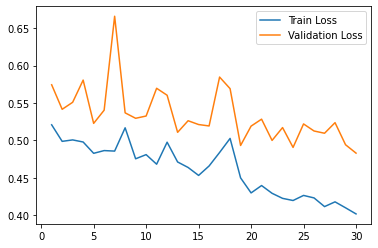

In [ ]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, 30, DEVICE)
test_acc = get_accuracy(model, testloader, device=DEVICE)
print(f'Test accuracy: {100 * test_acc:.2f}')

<font size=3 color='royalblue'><b>
I got ~80% ✊ The model looks good, but it seems that we might need 2-3 times more time to train it.
As this model has a Dropout layers - that helps us to avoid overfitiing, but at the same time the speed of learing decreases.
Maybe it needs biger learning rate?</b></font>

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

![](https://i.imgflip.com/1nwb7v.jpg)

Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**